In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng()

## chapter 1
### 1. 
generate spikes for 10s using a Poisson spike generator with a constant rate of 100Hz and record their times of occurrence
compute the coefficient of variation of the interspike intervals, and the Fano factor for the spike counts obtained over conting intervals ranging from 1 to 100ms.
plot the ISI histogram

In [340]:
T = 100 # total time, seconds
r = 100 # firing rate, Hz
dt = 1e-3 # timestep, seconds
tmax = int(T/dt) # max time 
t = np.arange(0, tmax) # time vector
rt = dt * r # time dependent firing rate

In [341]:
# generate spikes
spikes = rng.poisson(lam=rt, size=tmax)
spikes[spikes > 1] = 1
# get spike times
spike_times = np.where(spikes)[0]
# get ISI
isi = np.diff(spike_times)

In [342]:
# get coefficient variation
mean_isi = np.mean(isi)
std_isi = np.std(isi)
c_v = std_isi / mean_isi
print(f'Coefficient of variation is: {c_v}')

def get_fano_factor(spikes, window_size):
    """returns fano factor for spike"""
    counts = []
    for i in range(1, int(len(spikes) / window_size + 1)):
        counts.append(sum(spikes[(i - 1) * window_size: (i * window_size)]))

    return np.var(counts) / np.mean(counts)

fano_factors = []
for i in range(1, 101):
    fano_factors.append(get_fano_factor(spikes, i))

Coefficient of variation is: 0.9586557318347995


(0.0, 0.9649924468446353)

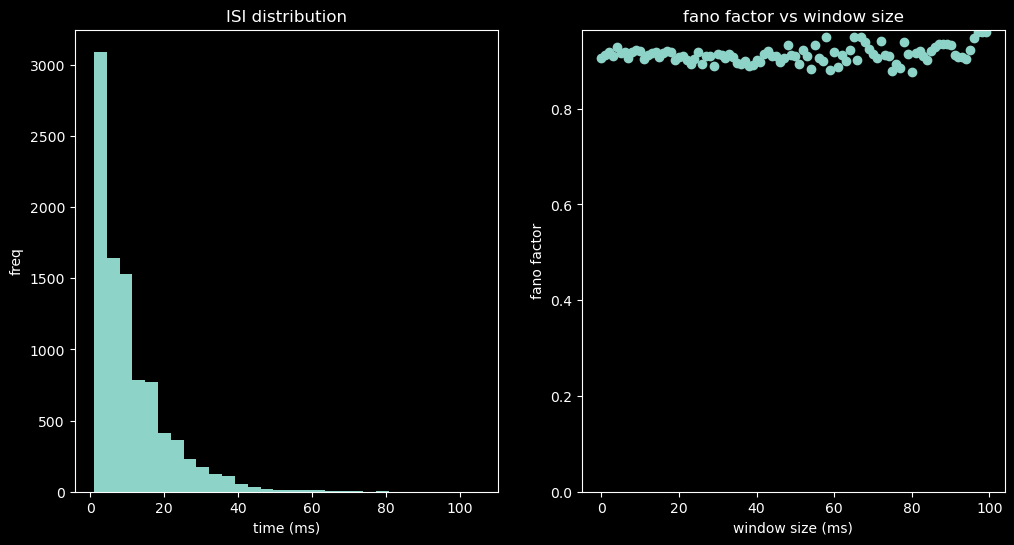

In [343]:
# plot ISI 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(isi, bins=30)
ax[0].set_title('ISI distribution')
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('freq')

ax[1].scatter(np.arange(0, 100, 1), fano_factors)
ax[1].set_title('fano factor vs window size')
ax[1].set_xlabel('window size (ms)')
ax[1].set_ylabel('fano factor')
ax[1].set_ylim(bottom=0)

## 2.
add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time.
- initially, set firing rate to constant value $r(t) = r_0$
- after every spike, set $r(t)$ to 0, and allow it to recover exponentially back to $r_0$ with a time constant $\tau_{ref}$ that controls the refractory rate
- have $r(t)$ obey:
$
\tau_{ref}\frac{dr}{dt} = r_0 - r
$
except immediately after a spike, when it is set to 0.

- plot the coefficient of variation as a function of $\tau_{ref}$ over the range $1\text{ms} \leq \tau_{ref} \leq 20\text{ms}$
- plot ISI histograms for different values of $\tau_{ref}$ in this range
- compute fano factor for spike counts obtained over counting intervals ranging from 1 to 100ms for the case $\tau_{ref}$ = 10ms

In [344]:
r0 = 100 # initial firing rate, Hz

def drdt(r, r0, tau_ref, dt):
    """updates spike generating equation"""
    drdt = (r0 - r) / tau_ref
    return drdt * dt

# initialize firing rate array
r = np.zeros_like(t)
r[0] = r0

# generate spikes function
def refractoriness_spikes(tmax, dt, tau_ref, r0):
    """ generates poisson process spikes with refractoriness"""
    spikes = np.zeros(tmax)
    for i in range(tmax):
        if rng.poisson(lam=0.1, size=1) > r[i]*dt:
            spikes[i] = 1
            r[i] = 0
        else:
            r[i] += drdt(r[i-1], r0, tau_ref, dt)
    #pikes[spikes > 1] = 1
    return spikes

# coefficient of variation function
def get_cv(isi):
    return np.std(isi)/np.mean(isi)

In [345]:
tau_ref_list = []
isi_list = []
cv_list = []
for i in range (1, 21):
    tau_ref = i * 1e-3
    tau_ref_list.append(tau_ref)
    spikes = refractoriness_spikes(tmax, dt, tau_ref, r0)
    spike_times = np.where(spikes)[0]
    isi = np.diff(spike_times)
    isi_list.append(isi)
    cv_list.append(get_cv(isi))

In [346]:
# for case where t_ref = 10
tau_ref = 10e-3
spikes = refractoriness_spikes(tmax, dt, tau_ref, r0)

fano_factors = []
for i in range(1, 101):
    fano_factors.append(get_fano_factor(spikes, i))

spike_times = np.where(spikes)[0]
isi = np.diff(spike_times)

(0.0, 0.86282524266599)

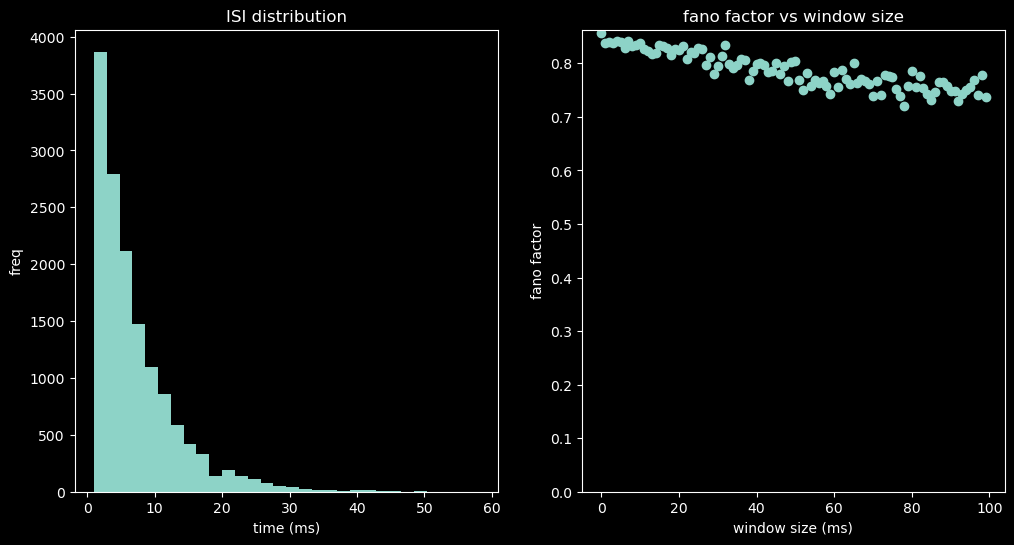

In [347]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(isi, bins=30)
ax[0].set_title('ISI distribution')
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('freq')

ax[1].scatter(np.arange(0, 100, 1), fano_factors)
ax[1].set_title('fano factor vs window size')
ax[1].set_xlabel('window size (ms)')
ax[1].set_ylabel('fano factor')
ax[1].set_ylim(bottom=0)


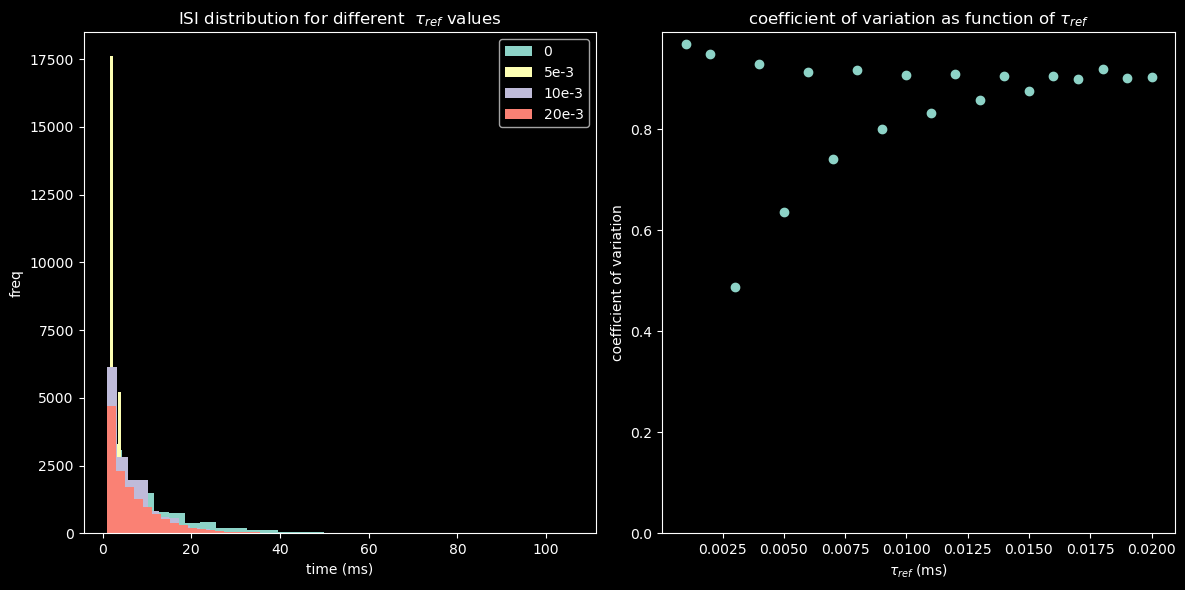

In [348]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(isi_list[0], bins=30, label='0')
ax[0].hist(isi_list[4], bins=30, label='5e-3')
ax[0].hist(isi_list[9], bins=30, label='10e-3')
ax[0].hist(isi_list[19], bins=30, label='20e-3')

ax[0].set_title('ISI distribution for different  ' r'$\tau_{ref}$ values')       
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('freq')    
ax[0].legend()

ax[1].scatter(tau_ref_list, cv_list)
ax[1].set_title('coefficient of variation as function of 'r'$\tau_{ref}$')
ax[1].set_xlabel(r'$\tau_{ref}$ (ms)')
ax[1].set_ylabel('coefficient of variation')
ax[1].set_ylim(bottom=0)

plt.tight_layout()

In [ ]:
isi_list[19]x

IndexError: list index out of range